In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Outlier detection

<Axes: >

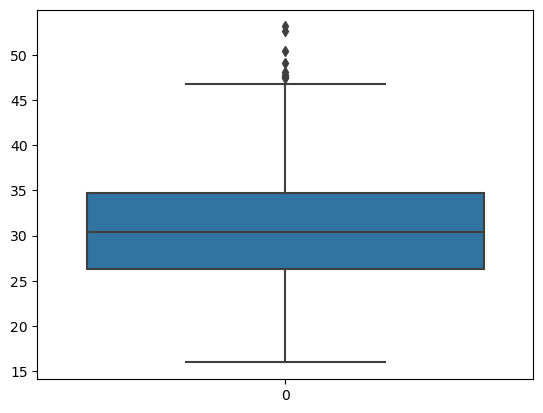

In [11]:
sns.boxplot(df.bmi)

### outlier removal by replacement with median


In [14]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)

In [15]:
q1,q3

(26.29625, 34.69375)

In [18]:
#Inter quartile range
IQR = q3-q1

In [19]:
IQR

8.3975

In [20]:
upper_limit = q3+1.5*IQR

In [21]:
upper_limit

47.290000000000006

In [22]:
lower_limit = q1-1.5*IQR
lower_limit

13.7

In [23]:
df.median()

C:\Users\acer\AppData\Local\Temp\ipykernel_6428\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [24]:
df['bmi'] = np.where(df['bmi']>upper_limit,30,df['bmi'])

<Axes: >

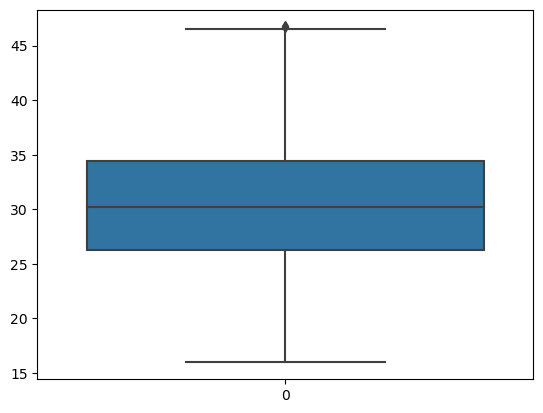

In [25]:
sns.boxplot(df.bmi)

In [26]:
df.shape

(1338, 7)

## 1. Outlier removal using IQR

<Axes: >

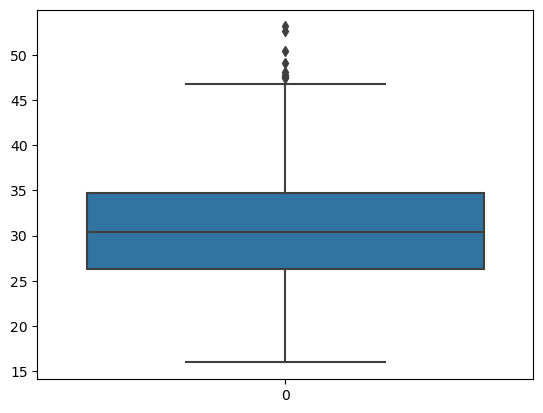

In [28]:
sns.boxplot(df.bmi)

In [29]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)

In [30]:
print(q1)
print(q3)

26.29625
34.69375


In [31]:
IQR = q3-q1

In [32]:
upper_limit = q3+1.5*IQR

In [33]:
upper_limit

47.290000000000006

In [34]:
df = df[df.bmi<upper_limit]

<Axes: >

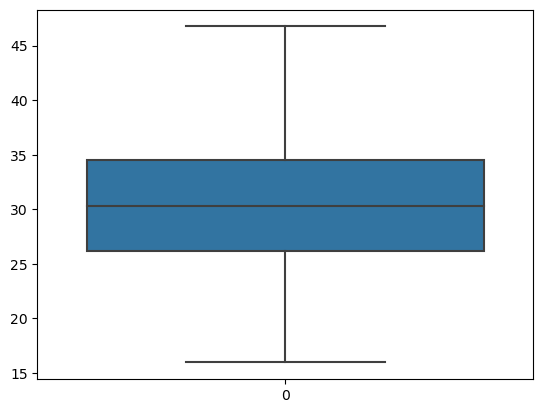

In [35]:
sns.boxplot(df.bmi)

In [36]:
df.shape

(1329, 7)

### Z score method for removal

<Axes: >

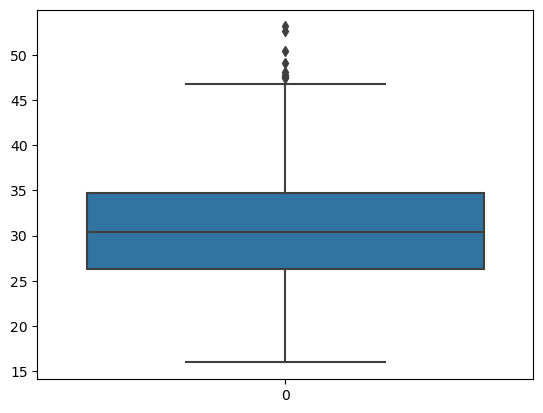

In [38]:
sns.boxplot(df.bmi)

In [39]:
from scipy import stats

In [42]:
bmi_zscore = stats.zscore(df.bmi) #-3 to 3 is standard range for sd for normal distribution
bmi_zscore

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

In [43]:
df_z = df[np.abs(bmi_zscore)<=3]

<Axes: >

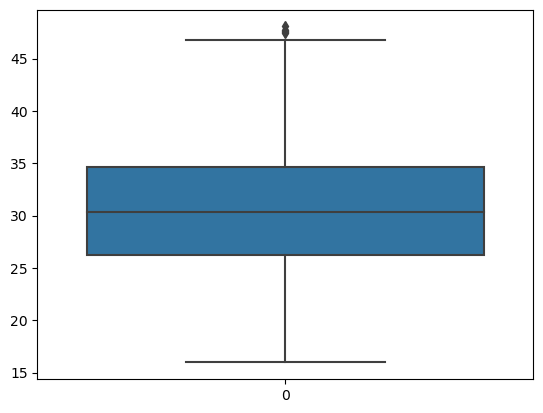

In [44]:
sns.boxplot(df_z.bmi)

In [47]:
df_z.shape

(1334, 7)

### Percentile method

<Axes: >

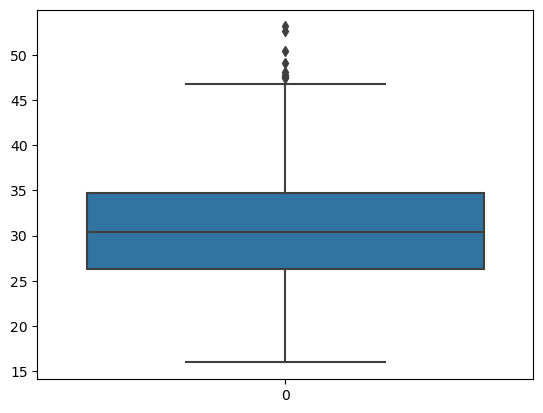

In [46]:
sns.boxplot(df.bmi)

In [48]:
p99 = df.bmi.quantile(0.99)

In [49]:
p99

46.40789999999996

In [50]:
df = df[df.bmi<=p99]

<Axes: >

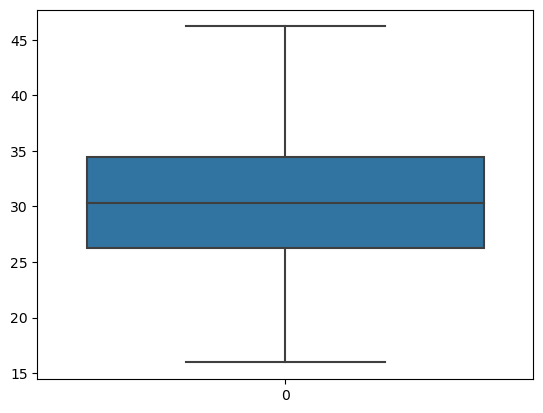

In [51]:
sns.boxplot(df.bmi)

In [52]:
df.shape

(1324, 7)